# Alpha Waves Example

In this notebook, we will be using the SpikerTools library to analyze some alpha wave data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

Alpha Waves Background:
Alpha waves arise in the brain when the subject is in a calm, resting state. Their frequency range is between 8 and 13 Hz, usually at 10 Hz. One way to record them is to place electrodes over the visual cortex (the occipital lobe towards the back of the subject's head), and have the subject close their eyes. The uniform visual stimulus induced by this action ellicits synchronous activity over the visual cortex, resulting in alpha waves!

In this data file, when the subject closes their eyes, it is marked by "Closed" in the events file. When the subject's eyes are opened, it is marked by "Open".

The goal is to detect the alpha waves present when the subject's eyes are closed. Let's get started!

First, let's import the spikertools library!

In [6]:
#clone package repo if not already cloned
#!git clone https://github.com/BackyardBrains/SpikerTools.git
%cd ..

!pip install -e .


/Users/gagegreg/Documents/github/SpikerTools/venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/gagegreg/Documents/github/SpikerTools
Obtaining file:///Users/gagegreg/Documents/github/SpikerTools
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for spikertools (pyproject.toml) ... done
  Created wheel for spikertools: filename=spikertools-0.1-0.editable-py3-none-any.whl size=2821 sha256=f74ea4f87c66f28a8e51b7cce41a403518697da3de93ad62f5f327a268473df6
  Stored in directory: /private/var/folders/sd/c04hnjpn14q13jty8vj37w6h0000gn/T/pip-ephem-wheel-cache-yippwjv9/wheels/02/fc/c1/d3e33798a1d8ec4a655f8de99d024c645cd4a100238debbda4
Successfully built spikertools
  Attempting uninstall: spikertools
    Found existing installation: spikertools 0.1
    Uninstalling spikertools-0.1:
      Successfully uninstalled spikertools-0.1


ModuleNotFoundError: No module named 'SpikerTools'

Next, we create a Session object using the path of the data file as shown below.

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

In [9]:
from spikertools import Session
import os

# Define the paths to your data files
wav_file_path = 'data/eeg/p300/BYB_Recording_2019-06-11_13.23.58.wav'
# Initialize the Session

session = Session(wav_file_path)


Loaded WAV file: data/eeg/p300/BYB_Recording_2019-06-11_13.23.58.wav
Sample rate: 10000 Hz
Data length: 6217716 samples
Looking for events file: data/eeg/p300/BYB_Recording_2019-06-11_13.23.58-events.txt
Added event: 1, timestamp: 0.425
Added event: 2, timestamp: 1.31
Added event: _ch0_neuron0, timestamp: 0.6
Loaded 2 events.


First, let's take a look at our data. What does it look like in general? How long is the session? How are the events distributed? These questions can be answered by plotting an overview of the Session using the plot_overview function.

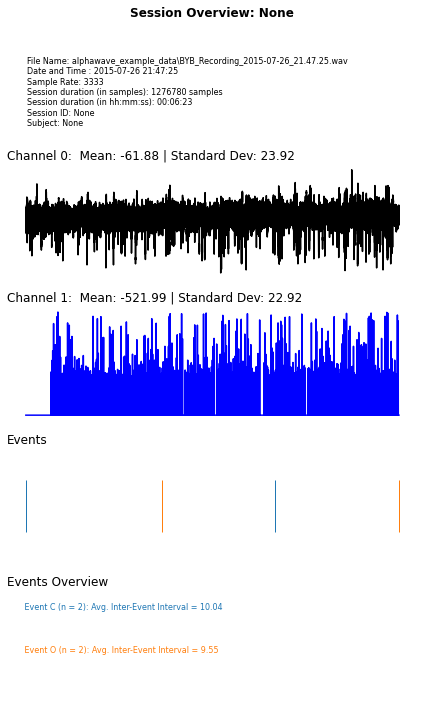

In [4]:
aw.plot_overview()

Let's plot an interval of the data to see if we can detect the alpha waves. The plot_interval function takes two required arguments: the first one is the channel index (here, we care about Channel 0). The second is a tuple with the time bounds. Here, I am plotting between 7 and 8 seconds, so I use (7,8).

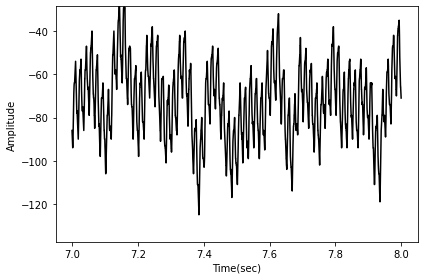

In [4]:
aw.plot_interval(0,(7,8))


They're present! But there's a lot of high frequency noise. We can get rid of that by filtering our data using the filter function. The filtering function takes a few required arguments: 
The cutoff frequency (the frequency at which we would like to filter, here it is 20 since the data we are looking for is below 20 Hz)
The filter type, this can be lowpass ("lp") to reduce high frequencies, or high pass ("hp") to reduce low frequencies. Since I want to remove the high frequency noise, I use a low pass filter!
The channel index. Here I am filtering Channel 0.

In [5]:
aw._filt(20,"lp", channel_index=0)

After filtering, let's plot that same interval again.

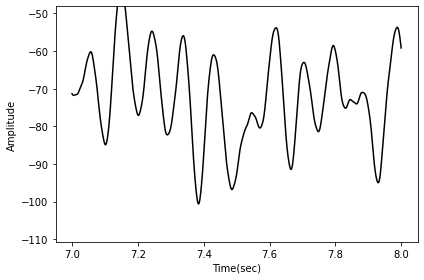

In [6]:
aw.plot_interval(0,(7,8))

Now our data looks much cleaner! Next, let us try and visualize the frequency using some of our frequency plotting functions!

The first one is the power spectral density plot (PSD for short). It shows you the relative power of each frequency in a signal. We would expect to see a peak around 10 Hz for alpha waves!

The plot-psd function takes two required arguments:
- the channel index (in our case, it's 0)
- the time bound that we would like to analyze (here, I want to analyze between 5 and 10 seconds since this is when the subject's eyes are closed)


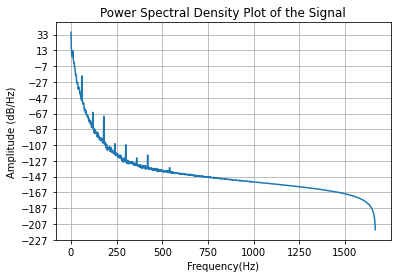

In [7]:
aw.plot_psd(0,(5,10))

Clearly, we would like to see the plot around 10 Hz. Luckily, the plot_psd function has some optional parameters that can improve the view!

These include:
freq_bounds which allows you to set the bounds of the frequency (let's set this to be between 5 and 20 Hz)
amp_bounds which allows you to set the bounds of the amplitude (let's set this to be between -5 and 20 dB/Hz)
and freq_res which allows you to set the frequency resolution (by default it is 1, let's set it to 0.5 for a better resolution)

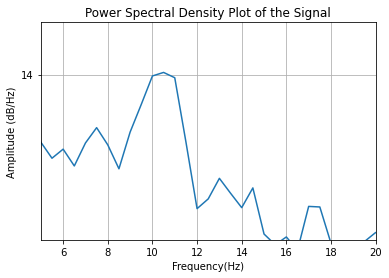

In [8]:
aw.plot_psd(0,(5,10), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)

We can see an obvious peak at 10 Hz! Now let's compare this to when the subject has their eyes open. 

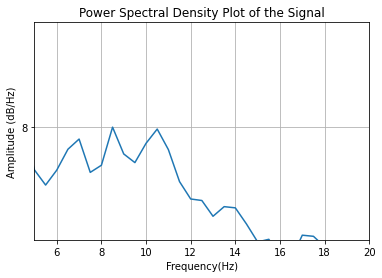

In [9]:
aw.plot_psd(0,(12,17), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)

Here the peak is almost insignificant (around 8dB/Hz compared to the previous 14dB/hz)

Another function we can plot is the spectrogram. This generates a heat map representing the amplitude of a frequency versus time. The plotting function takes similar parameters to the psd plotting function. 

We can clearly see two streaks of yellow corresponding to high amplitude at 10 Hz, around the time the subject closes their eyes!

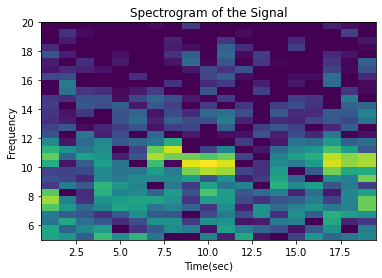

In [10]:
aw.plot_spectrogram(0,bounds=(0,20), freq_bounds=(5,20), amp_bounds=(-5,20), freq_res=0.5)